In [1]:
# python
import sys
import statistics
import os
import importlib
# columnar analysis
import awkward as ak
from dask.distributed import Client
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import processor
import hist
import matplotlib
import matplotlib.patches as patches
import numpy
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities, cutflow, scaleout
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
#utilities.set_plot_style()
%matplotlib inline

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

/home/cms-jovyan/SIDM/sidm/studies/signal_kinematics/../../../sidm/tools/scaleout.py:12: UserWarning: Registering a `SchedulerPlugin` as a worker plugin is not allowed, registering as a scheduler plugin instead. To register as a worker plugin, inherit from `WorkerPlugin`.
  client.register_worker_plugin(PipInstall(packages=dependencies, pip_options=["--upgrade"]))


Connection method: Direct,
Dashboard: /user/yfv2ev@virginia.edu/proxy/8787/status,
Comm: tls://192.168.197.234:8786,Workers: 0
Dashboard: /user/yfv2ev@virginia.edu/proxy/8787/status,Total threads: 0
Started: 1 minute ago,Total memory: 0 B


In [3]:
samples = []
bg_samples = [
    "TTJets",
]

#######################################################
SIDM_4mu_100GeV_0p25GeV_samples = [
    "4mu_100GeV_0p25GeV_0p02mm",
    "4mu_100GeV_0p25GeV_0p2mm",
    "4mu_100GeV_0p25GeV_2p0mm",
    "4mu_100GeV_0p25GeV_10p0mm",
    "4mu_100GeV_0p25GeV_20p0mm",
]
SIDM_4mu_100GeV_1p2GeV_samples = [
    "4mu_100GeV_1p2GeV_0p096mm",
    "4mu_100GeV_1p2GeV_0p96mm",
    "4mu_100GeV_1p2GeV_9p6mm",
    "4mu_100GeV_1p2GeV_48p0mm",
    "4mu_100GeV_1p2GeV_96p0mm",
]
SIDM_4mu_100GeV_5p0GeV_samples = [
    "4mu_100GeV_5p0GeV_0p4mm",
    "4mu_100GeV_5p0GeV_4p0mm",
    "4mu_100GeV_5p0GeV_40p0mm", 
    "4mu_100GeV_5p0GeV_200p0mm",
    "4mu_100GeV_5p0GeV_400p0mm",
]
#######################################################
SIDM_4mu_150GeV_0p25GeV_samples = [
    "4mu_150GeV_0p25GeV_0p013mm",
    "4mu_150GeV_0p25GeV_0p13mm",
    "4mu_150GeV_0p25GeV_1p3mm",
    "4mu_150GeV_0p25GeV_6p7mm",
    "4mu_150GeV_0p25GeV_13p0mm",
]
SIDM_4mu_150GeV_1p2GeV_samples = [
    "4mu_150GeV_1p2GeV_0p064mm",
    "4mu_150GeV_1p2GeV_0p64mm",
    "4mu_150GeV_1p2GeV_6p4mm",
    "4mu_150GeV_1p2GeV_32p0mm",
    "4mu_150GeV_1p2GeV_64p0mm",
]
SIDM_4mu_150GeV_5p0GeV_samples = [
    "4mu_150GeV_5p0GeV_0p27mm",
    "4mu_150GeV_5p0GeV_2p7mm",
    "4mu_150GeV_5p0GeV_27p0mm",
    "4mu_150GeV_5p0GeV_130p0mm",
    "4mu_150GeV_5p0GeV_270p0mm",
]
#######################################################
SIDM_4mu_200GeV_0p25GeV_samples = [
    "4mu_200GeV_0p25GeV_0p01mm",
    "4mu_200GeV_0p25GeV_0p1mm",
    "4mu_200GeV_0p25GeV_1p0mm",
    "4mu_200GeV_0p25GeV_5p0mm",
    "4mu_200GeV_0p25GeV_10p0mm",
]
SIDM_4mu_200GeV_1p2GeV_samples = [
    "4mu_200GeV_1p2GeV_0p048mm",
    "4mu_200GeV_1p2GeV_0p48mm",
    "4mu_200GeV_1p2GeV_4p8mm",
    "4mu_200GeV_1p2GeV_24p0mm",
    "4mu_200GeV_1p2GeV_48p0mm",
]
SIDM_4mu_200GeV_5p0GeV_samples = [
    "4mu_200GeV_5p0GeV_0p2mm",
    "4mu_200GeV_5p0GeV_2p0mm",
    "4mu_200GeV_5p0GeV_20p0mm",
    "4mu_200GeV_5p0GeV_100p0mm",
    "4mu_200GeV_5p0GeV_200p0mm",
]
#######################################################
SIDM_4mu_500GeV_0p25GeV_samples = [
    "4mu_500GeV_0p25GeV_0p004mm",
    "4mu_500GeV_0p25GeV_0p04mm",
    "4mu_500GeV_0p25GeV_0p4mm",
    "4mu_500GeV_0p25GeV_2p0mm",
    "4mu_500GeV_0p25GeV_4p0mm",
]
SIDM_4mu_500GeV_1p2GeV_samples = [
    "4mu_500GeV_1p2GeV_0p019mm",
    "4mu_500GeV_1p2GeV_0p19mm",
    "4mu_500GeV_1p2GeV_1p9mm",
    "4mu_500GeV_1p2GeV_9p6mm",
    "4mu_500GeV_1p2GeV_19p0mm",
]
SIDM_4mu_500GeV_5p0GeV_samples = [
    "4mu_500GeV_5p0GeV_0p08mm",
    "4mu_500GeV_5p0GeV_0p8mm",
    "4mu_500GeV_5p0GeV_8p0mm",
    "4mu_500GeV_5p0GeV_40p0mm",
    "4mu_500GeV_5p0GeV_80p0mm",
    
    #"4mu_500GeV_5p0GeV_800p0mm",
    #"4mu_500GeV_5p0GeV_8000p0mm", these are also here as long Lxy tests
]
#######################################################
SIDM_4mu_800GeV_0p25GeV_samples = [
    "4mu_800GeV_0p25GeV_0p0025mm",
    "4mu_800GeV_0p25GeV_0p025mm",
    "4mu_800GeV_0p25GeV_0p25mm",
    "4mu_800GeV_0p25GeV_1p2mm",
    "4mu_800GeV_0p25GeV_2p5mm",
]
SIDM_4mu_800GeV_1p2GeV_samples = [
    "4mu_800GeV_1p2GeV_0p012mm",
    "4mu_800GeV_1p2GeV_0p12mm",
    "4mu_800GeV_1p2GeV_1p2mm",
    "4mu_800GeV_1p2GeV_6p0mm",
    "4mu_800GeV_1p2GeV_12p0mm",
]
SIDM_4mu_800GeV_5p0GeV_samples = [
    "4mu_800GeV_5p0GeV_0p05mm",
    "4mu_800GeV_5p0GeV_0p5mm",
    "4mu_800GeV_5p0GeV_5p0mm",
    "4mu_800GeV_5p0GeV_25p0mm",
    "4mu_800GeV_5p0GeV_50p0mm",
]
#######################################################
SIDM_4mu_1000GeV_0p25GeV_samples = [ # getting keyErrors on all of these; I think they might be empty
    "4mu_1000GeV_0p25GeV_0p002mm", # Running gives "cannot unpack non-iterable NoneType object"
    "4mu_1000GeV_0p25GeV_0p02mm",
    "4mu_1000GeV_0p25GeV_0p2mm",
    "4mu_1000GeV_0p25GeV_1p0mm",
    "4mu_1000GeV_0p25GeV_2p0mm",
]
SIDM_4mu_1000GeV_1p2GeV_samples = [ # these also give keyErrors
    "4mu_1000GeV_1p2GeV_0p0096mm",
    "4mu_1000GeV_1p2GeV_0p096mm",
    "4mu_1000GeV_1p2GeV_0p96mm",
    "4mu_1000GeV_1p2GeV_4p8mm",
    "4mu_1000GeV_1p2GeV_9p6mm",
]
SIDM_4mu_1000GeV_5p0GeV_samples = [
    "4mu_1000GeV_5p0GeV_0p04mm",
    "4mu_1000GeV_5p0GeV_0p4mm",
    "4mu_1000GeV_5p0GeV_4p0mm",
    "4mu_1000GeV_5p0GeV_20p0mm",
    "4mu_1000GeV_5p0GeV_40p0mm",
]
#######################################################


SIDM_4mu_100GeV_samples = []
SIDM_4mu_100GeV_samples = SIDM_4mu_100GeV_samples + SIDM_4mu_100GeV_0p25GeV_samples + SIDM_4mu_100GeV_1p2GeV_samples + SIDM_4mu_100GeV_5p0GeV_samples

SIDM_4mu_150GeV_samples = []
SIDM_4mu_150GeV_samples = SIDM_4mu_150GeV_samples + SIDM_4mu_150GeV_0p25GeV_samples + SIDM_4mu_150GeV_1p2GeV_samples + SIDM_4mu_150GeV_5p0GeV_samples

SIDM_4mu_200GeV_samples = []
SIDM_4mu_200GeV_samples = SIDM_4mu_200GeV_samples + SIDM_4mu_200GeV_0p25GeV_samples + SIDM_4mu_200GeV_1p2GeV_samples + SIDM_4mu_200GeV_5p0GeV_samples

SIDM_4mu_500GeV_samples = []
SIDM_4mu_500GeV_samples = SIDM_4mu_500GeV_samples + SIDM_4mu_500GeV_0p25GeV_samples + SIDM_4mu_500GeV_1p2GeV_samples + SIDM_4mu_500GeV_5p0GeV_samples

SIDM_4mu_800GeV_samples = []
SIDM_4mu_800GeV_samples = SIDM_4mu_800GeV_samples + SIDM_4mu_800GeV_0p25GeV_samples + SIDM_4mu_800GeV_1p2GeV_samples + SIDM_4mu_800GeV_5p0GeV_samples

SIDM_4mu_1000GeV_samples = []
SIDM_4mu_1000GeV_samples = SIDM_4mu_1000GeV_samples + SIDM_4mu_1000GeV_0p25GeV_samples + SIDM_4mu_1000GeV_1p2GeV_samples + SIDM_4mu_1000GeV_5p0GeV_samples

samples_sublists = [
    SIDM_4mu_100GeV_0p25GeV_samples, SIDM_4mu_100GeV_1p2GeV_samples, SIDM_4mu_100GeV_5p0GeV_samples, 
    SIDM_4mu_150GeV_0p25GeV_samples, SIDM_4mu_150GeV_1p2GeV_samples, SIDM_4mu_150GeV_5p0GeV_samples,
    SIDM_4mu_200GeV_0p25GeV_samples, SIDM_4mu_200GeV_1p2GeV_samples, SIDM_4mu_200GeV_5p0GeV_samples, 
    SIDM_4mu_500GeV_0p25GeV_samples, SIDM_4mu_500GeV_1p2GeV_samples, SIDM_4mu_500GeV_5p0GeV_samples,
    SIDM_4mu_800GeV_0p25GeV_samples, SIDM_4mu_800GeV_1p2GeV_samples, SIDM_4mu_800GeV_5p0GeV_samples,
    #SIDM_4mu_1000GeV_0p25GeV_samples, 
    #SIDM_4mu_1000GeV_1p2GeV_samples, # These two groups don't work at all
    #SIDM_4mu_1000GeV_5p0GeV_samples,
    ]

In [4]:
samples = []
samples = samples + bg_samples
for sublist in samples_sublists:
#    print(sublist[0])
    samples = samples + [sublist[0]]
#samples = samples + [SIDM_4mu_100GeV_samples[0]] + [SIDM_4mu_200GeV_samples[0]] + [SIDM_4mu_500GeV_samples[0]] + [SIDM_4mu_800GeV_samples[0]]
#print(samples)

In [5]:
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2")

In [6]:
runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.DaskExecutor(client=client),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    # maxchunks=1,
)

hist_menu = utilities.load_yaml("../configs/hist_collections.yaml")
hist_choice = "base"
collection = utilities.flatten(hist_menu[hist_choice]) #To change the histograms used, swap "base" for the other collections
p = sidm_processor.SidmProcessor(
    [
        "base",
        "baseNoLj",
        "4mu", # basic cuts + 4mu requirement
        "2mu2e",
        #"matchedLj", # strict cuts on lj objects
        #"4mu_matchedLj",
    ],
    [hist_choice],
    lj_reco_choices=["0.4"],
    #llpnanoaod=True,
)
output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

/opt/conda/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.0. Please consider upgrading.
  warnings.warn(


In [7]:
cutflow.print_multi_table([out[samples[i]]["cutflow"]["4mu"] for i in range(5)], [samples[i] for i in range(5)], fraction=False, unweighted=False)


cut name        Total cuts:                  Total cuts:                  Total cuts:                Total cuts:                   Total cuts:
                      TTJets    4mu_100GeV_0p25GeV_0p02mm    4mu_100GeV_1p2GeV_0p096mm    4mu_100GeV_5p0GeV_0p4mm    4mu_150GeV_0p25GeV_0p013mm
------------  --------------  ---------------------------  ---------------------------  -------------------------  ----------------------------
No selection      9219850.00                     52591.00                     55023.00                   41901.00                      35551.00
PV filter         9200665.00                     52371.00                     54917.00                   41260.00                      35330.00
>=2 LJs            259058.00                      3149.00                     46151.00                   34443.00                       3625.00
4mu                   157.00                      3050.00                     39562.00                   29237.00                       

In [8]:
out[samples[0]]["cutflow"]["4mu"].print_table(fraction=False, unweighted=False)

cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection           9219850.0    9219850.0
PV filter              9200665.0    9200665.0
>=2 LJs                 259616.0     259058.0
4mu                        157.0        157.0


259050.0


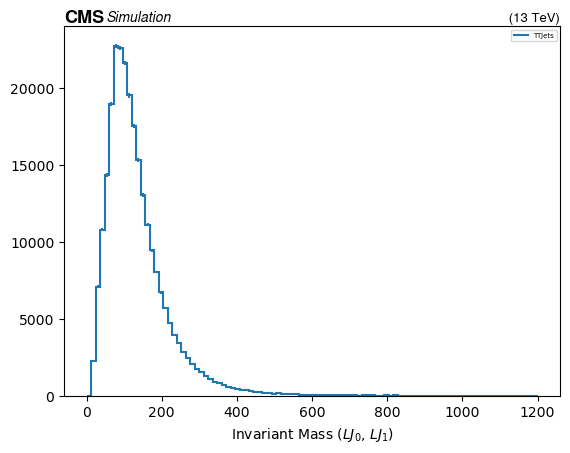

In [9]:
#out[samples[0]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["base", :, :].plot2d_full()

a = out[samples[0]]["hists"]["lj_lj_invmass"]["base", :]
utilities.plot(a, flow='none', density=False)
plt.legend([samples[0]], loc=1, prop={'size': 5}, ncol=2)
print(a.to_numpy()[0].sum())

Plots several different histograms for all samples. It is clear from these that the 4mu samples (of course) don't have electrons or photons, and are almost all composed of four muons. Under the matchedLj channel, the lepton jet object cuts are more strict than those of the 4mu or llpnano channels, so the number of cut events is higher on the >=2 lj cut (since there are fewer objects qualifying as lepton jets). The background cannot be analyzed in this channel, since one of the cuts requires >= 2 matched dark photons ("As"), which are gen-level particles. Since the background does not generate dark photons, none of the events have these As, so they are all cut.

In the low-mass (100GeV) samples of dark matter bound states, the number of dsa muons is relatively low, with most samples having only zero or one.

In high-mass cases (1000GeV), the more displaced samples are much less clustered around 4 muons, with a significant number of events having only three or less. These same samples were also more likely to have one or more dsa muons. I'm not sure if these are counted separately by the muon_n histogram.

In [10]:
def count1d(hist, bounds, verbose = False):
    result = 0
    x = hist.to_numpy()
    bins = []
    for i in range(len(x[0])):
        temp = [x[0][i], (x[1][i]+x[1][i+1])/2]
        bins.append(temp)
    for i in range(len(bins)):
        if bins[i][1] >= min(bounds[0]) and bins[i][1] <= max(bounds[0]):
            result += bins[i][0]
    return result

def count2d(hist, bounds, verbose = False):
    result = 0
    if type(hist) != numpy.ndarray: 
        x = hist.to_numpy()
    else:
        x = hist
    bins = []
    for i in range(len(x[2]) - 1): # each i corresponds to a row of bins
        for j in range(len(x[1]) - 1): # each j corresponds to the column
            bins.append([x[0][j][i], (x[1][j] + x[1][j+1])/2, (x[2][i] + x[2][i+1])/2])
    for i in range(len(bins)):
        if bins[i][1] >= bounds[0][0] and bins[i][1] <= bounds[1][0] and bins[i][2] >= bounds[0][1] and bins[i][2] <= bounds[1][1]:
            if verbose: print(bins[i])
            result += bins[i][0]
    return result

def drawRect(fig, ax, x0, x1, color='r'):
    ax.add_patch(patches.Rectangle((x0[0], x0[1]), abs(x0[0]-x1[0]), abs(x0[1]-x1[1]), linewidth=1, edgecolor=color, facecolor='none'))
    fig.show()
    
def countPlot(hist, fig, ax, bounds, color='r'):
    dim = len(hist.axes) if isinstance(hist, list) else len(hist.axes)
    if dim == 1:
        fig.axvline(x = bounds[0])
        fig.axvline(x = bounds[1])
    if dim == 2:
        drawRect(fig, ax, bounds[0], bounds[1], color)
    fig.show()
    return count(hist, bounds)
    
def countAll(hist, verbose=False):
    result = 0
    dim = len(hist.axes) if isinstance(hist, list) else len(hist.axes)
    if dim == 2:
        x = hist.to_numpy()
        bins = []
        for i in range(len(x[2]) - 1): # each i corresponds to a row of bins
            for j in range(len(x[1]) - 1): # each j corresponds to the column
                bins.append([x[0][j][i], (x[1][j] + x[1][j+1])/2, (x[2][i] + x[2][i+1])/2])
        for i in range(len(bins)):
            if verbose: print(bins[i])
            result += bins[i][0]
    return result
                
def ABCD(hist, fig, ax, x0, x1):
    lowX = x0[0]
    lowY = x0[1]
    midX = (x0[0] + x1[0]) / 2
    midY = (x0[1] + x1[1]) / 2
    highX = x1[0]
    highY = x1[1]
    
    xrange = midX-lowX
    yrange = midY-lowY
    
    drawRect(fig, ax, x0, (midX, midY), 'yellow') # C
    drawRect(fig, ax, (midX, lowY), (highX, midY), 'green') # D
    drawRect(fig, ax, (lowX, midY), (midX, highY), 'red') # A
    drawRect(fig, ax, (midX, midY), (highX, highY), 'orange') # B
    
    ax.text(lowX + 0.2*xrange, midY - 0.1*yrange, "C", fontsize=11, color='yellow')#, transform=ax.transAxes)
    ax.text(midX + 0.2*xrange, midY - 0.1*yrange, "D", fontsize=11, color='green')#, transform=ax.transAxes)
    ax.text(lowX + 0.2*xrange, highY - 0.1*yrange, "A", fontsize=11, color='red')#, transform=ax.transAxes)
    ax.text(midX + 0.2*xrange, highY - 0.1*yrange, "B", fontsize=11, color='orange')#, transform=ax.transAxes)
    
    countA = count2d(hist, [(lowX, midY), (midX, highY)])
    countB = count2d(hist, [(midX, midY), x1])
    countC = count2d(hist, [x0, (midX, midY)])
    countD = count2d(hist, [(midX, lowY), (highX, midY)])
    
    return [countA, countB, countC, countD]

def addHistDensities(hist1, hist2, scalar=1): 
    result = hist1/hist1.sum().value + hist2/hist2.sum().value * scalar
    result = result/result.sum().value
    return result

Points used are: (0, 0), (6.24, 5.95)
Events within the rectangle: 1277315.0


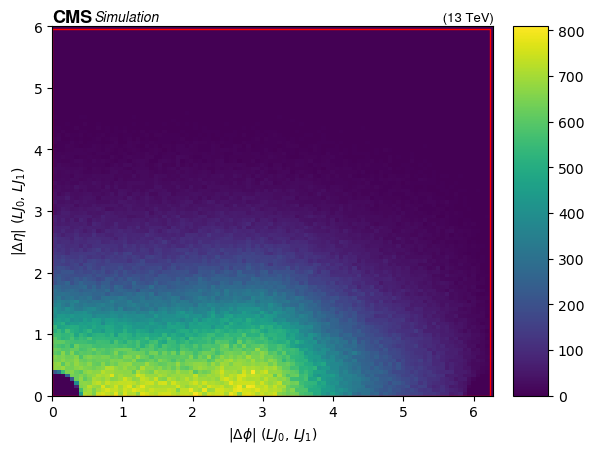

In [11]:
fig, ax = plt.subplots()
a = out[samples[0]]["hists"]["lj_lj_absdphi_absdeta"]["baseNoLj", :, :]
x = a.to_numpy()
utilities.plot(a)
x0 = (0, 0)
x1 = (6.24, 5.95) # bins[i] = [events, x (invmass), y (dPhi)]

#drawRect(fig, ax, x0, x1)
drawRect(fig, ax, (x0[0], x0[1]), (x1[0], x1[1]))
#print(f"Events: {countPlot(a, fig, ax, [(x0[0], x2[1]), (x2[0], x1[1])])}")
print(f"Points used are: ({x0[0]}, {x0[1]}), ({x1[0]}, {x1[1]})")
print(f"Events within the rectangle: {count2d(a, [(x0[0], x0[1]), (x1[0], x1[1])])}")

TTJets counts in each region [A, B, C, D]: [21151.0, 7920.0, 889605.0, 358727.0]
Ratios:
	A:B = 2.670580808080808
	C:D = 2.479894181369119
	A:B/C:D = 1.0768930497697338 = 1/0.93
-----------------------------------------

Events in the histogram: 1277403.0


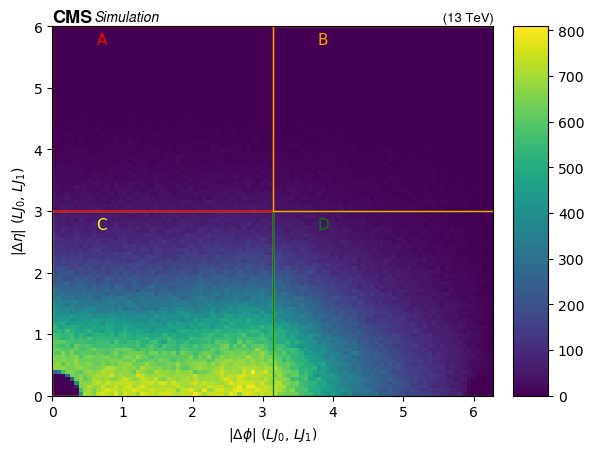

In [12]:
fig, (ax1) = plt.subplots()
a = out[samples[0]]["hists"]["lj_lj_absdphi_absdeta"]["baseNoLj", :, :]

x0 = (0, 0)
x1 = (6.3, 6)
x2 = ((x0[0]+x1[0])/2,(x0[1]+x1[1])/2)
#print(x2)

utilities.plot(a)
counts = ABCD(a, fig, ax1, x0, x1) # pass ABCD() a rectangle, and it is divided into 4 equal parts

fig.show()
    # Displays ABCD in order red, orange, yellow, green
print(f"{samples[0]} counts in each region [A, B, C, D]: {counts}")
if counts[1]==0:
    counts[1]=0.001
if counts[3]==0:
    counts[3]=0.001
A_to_B = counts[0]/counts[1]
C_to_D = counts[2]/counts[3]
print(f"Ratios:\n\tA:B = {A_to_B}\n\tC:D = {C_to_D}\n\tA:B/C:D = {A_to_B/C_to_D} = 1/{1/(A_to_B/C_to_D):.2f}\n-----------------------------------------\n")
print(f"Events in the histogram: {countAll(a, verbose=False)}")

TTJets counts in each region [A, B, C, D]: [2531.0, 1111.0, 174775.0, 80641.0]
Ratios:
	A:B = 2.2781278127812783
	C:D = 2.1673218338066245
	A:B/C:D = 1.0511257614103564 = 1/0.95
-----------------------------------------

4mu_800GeV_1p2GeV_0p012mm counts in each region [A, B, C, D]: [6224.0, 5376.0, 35062.0, 31562.0]
Ratios:
	A:B = 0.8637532133676091
	C:D = 0.9001768296161086
	A:B/C:D = 1.042169008097221 = 1/0.96
-----------------------------------------

Total Counts in each region: [8755.0, 6487.0, 209837.0, 112203.0]
Ratios:
	A:B = 0.7409480296973159
	C:D = 0.5347150407220843
	A:B/C:D = 0.7216633546357095 = 1/1.39
-----------------------------------------



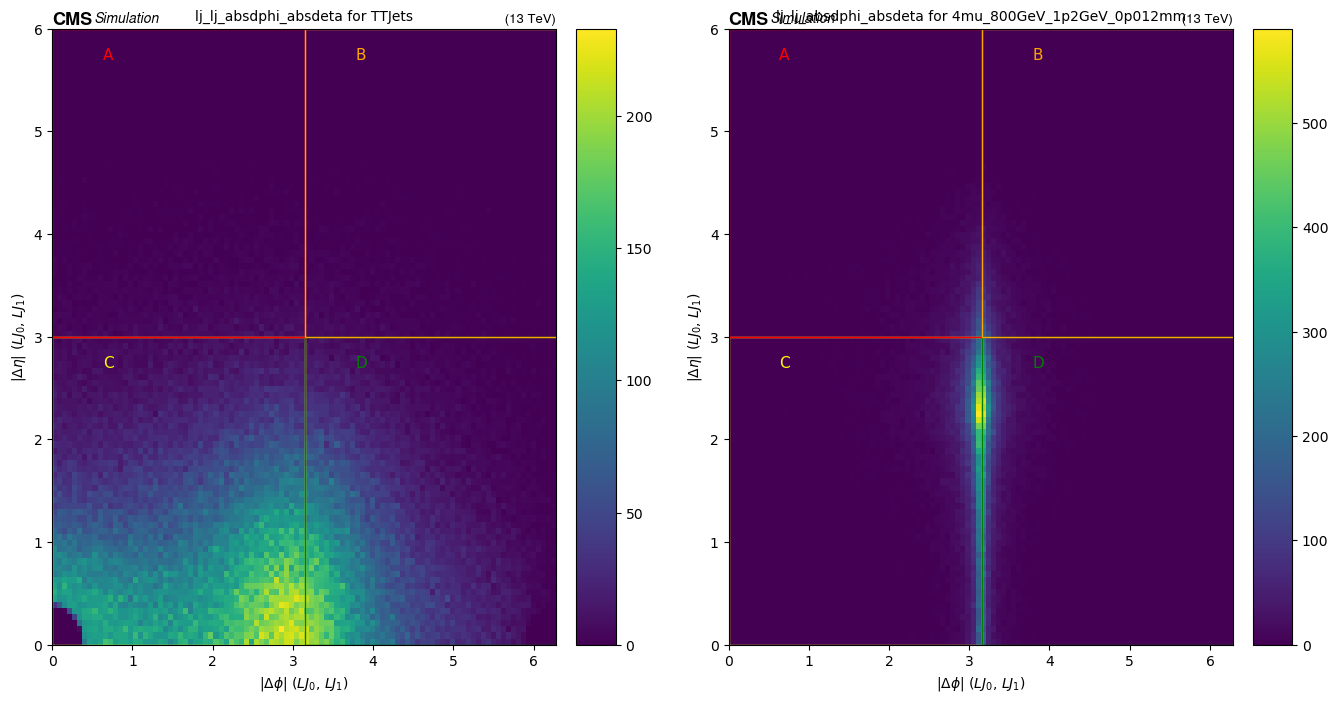

In [13]:
ind = -2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
a = out[samples[0]]["hists"]["lj_lj_absdphi_absdeta"]["base", :, :]
b = out[samples[ind]]["hists"]["lj_lj_absdphi_absdeta"]["base", :, :]

x0 = (0, 0)
x1 = (6.31, 6)
x2 = ((x0[0]+x1[0])/2,(x0[1]+x1[1])/2)
#print(x2)

plt.subplot(1,2,1)
utilities.plot(a)
counts = ABCD(a, fig, ax1, x0, x1) # pass ABCD() a rectangle, and it is divided into 4 equal parts

plt.subplot(1,2,2)
utilities.plot(b)
counts2 = ABCD(b, fig, ax2, x0, x1)

fig.show()
    # Displays ABCD in order red, orange, yellow, green
print(f"{samples[0]} counts in each region [A, B, C, D]: {counts}")
if counts[1]==0:
    counts[1]=0.001
if counts[3]==0:
    counts[3]=0.001
A_to_B = counts[0]/counts[1] if counts[0]!=0 else 0.00001
C_to_D = counts[2]/counts[3] if counts[2]!=0 else 0.00001
print(f"Ratios:\n\tA:B = {A_to_B}\n\tC:D = {C_to_D}\n\tA:B/C:D = {A_to_B/C_to_D} = 1/{1/(A_to_B/C_to_D):.2f}\n-----------------------------------------\n")

print(f"{samples[ind]} counts in each region [A, B, C, D]: {counts2}")
if counts2[1]==0:
    counts2[1]=0.001
if counts2[3]==0:
    counts2[3]=0.001
A_to_B2 = counts2[0]/counts2[1]
C_to_D2 = counts2[2]/counts2[3]
print(f"Ratios:\n\tA:B = {1/A_to_B2}\n\tC:D = {1/C_to_D2}\n\tA:B/C:D = {(A_to_B2/C_to_D2)} = 1/{1/(A_to_B2/C_to_D2):.2f}\n-----------------------------------------\n")

ax1.title.set_text(f"lj_lj_absdphi_absdeta for {samples[0]}")
ax1.title.set_size(10)
ax2.title.set_text(f"lj_lj_absdphi_absdeta for {samples[ind]}")
ax2.title.set_size(10)

totalCounts = [counts[i]+counts2[i] for i in range(len(counts))]
print(f"Total Counts in each region: {totalCounts}")
if totalCounts[1]==0:
    totalCounts[1]=0.001
if totalCounts[3]==0:
    totalCounts[3]=0.001
A_to_Btotal = totalCounts[0]/totalCounts[1]
C_to_Dtotal = totalCounts[2]/totalCounts[3]
totalRat = (A_to_Btotal/C_to_Dtotal)
print(f"Ratios:\n\tA:B = {1/A_to_Btotal}\n\tC:D = {1/C_to_Dtotal}\n\tA:B/C:D = {totalRat} = 1/{1/(totalRat):.2f}\n-----------------------------------------\n")


(3.155, 3.0)
[1327.0, 1041.0, 37012.0, 34455.0]
Ratios: A:B = 1.2735124760076775, C:D = 1.0742127412567117


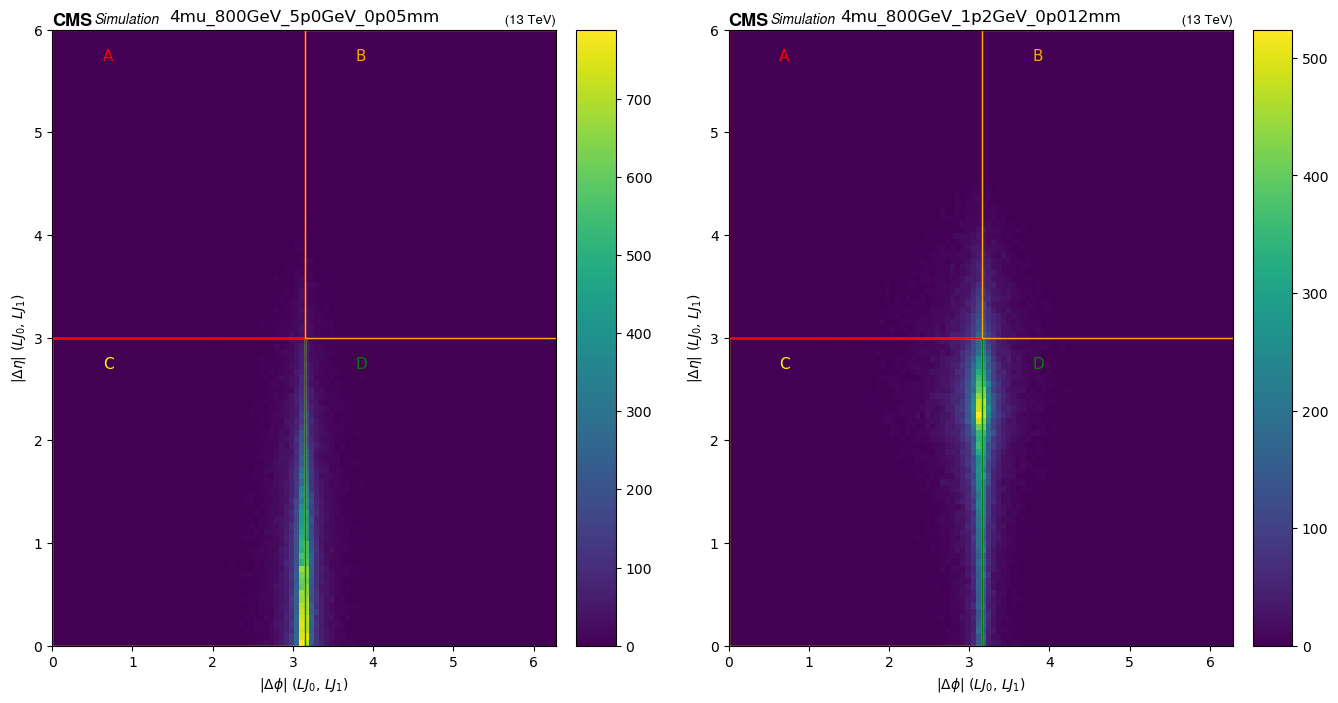

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.subplot(1,2,1)
a = out[samples[-1]]["hists"]["lj_lj_absdphi_absdeta"]["base", :, :]
utilities.plot(a)
x0 = (0, 0)
x1 = (6.31, 6)
x2 = ((x0[0]+x1[0])/2,(x0[1]+x1[1])/2)
print(x2)
counts = ABCD(a, fig, ax1, x0, x1) # pass ABCD() a rectangle, and it is divided into 4 equal parts
plt.title(f"{samples[-1]}")
fig.show()
# Displays in order red, orange, yellow, green
print(counts)
A_to_B = counts[0]/(counts[1]+1)
C_to_D = counts[2]/counts[3]
print(f"Ratios: A:B = {A_to_B}, C:D = {C_to_D}")

plt.subplot(1,2,2)
b = out[samples[-2]]["hists"]["lj_lj_absdphi_absdeta"]["4mu", :, :]
utilities.plot(b)
plt.title(f"{samples[-2]}")
counts = ABCD(b, fig, ax2, x0, x1)

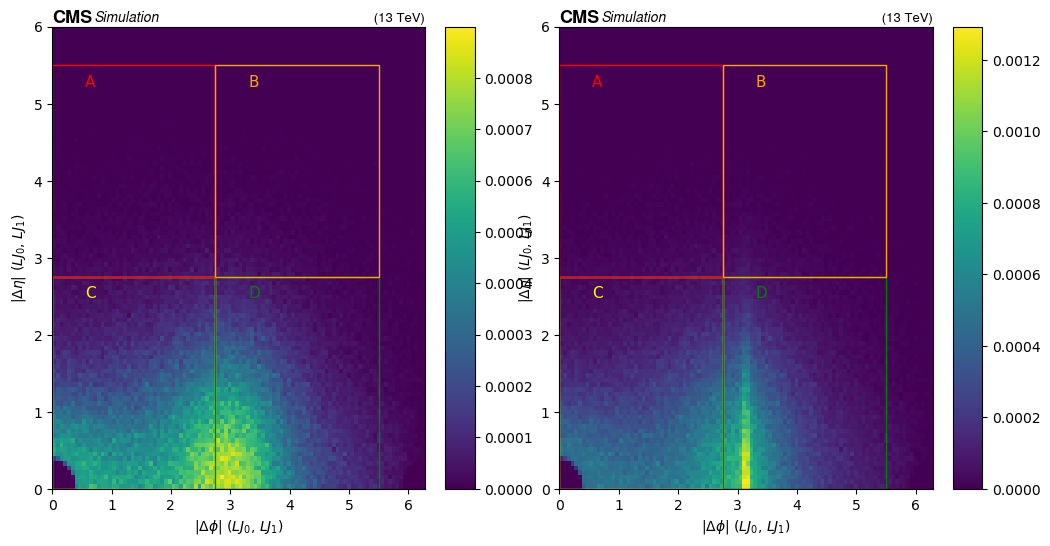

Background counts in each region [A, B, C, D]: [0.0138, 0.0102, 0.5472, 0.4203]
Ratios:
	A:B = 1.355765595463136
	C:D = 1.301796341194623
	A:B/C:D = 1.0414575249297344 = 1/0.96
-----------------------------------------

Events in the entire histogram: 1.0000
Total (TTJets + 4mu_800GeV_5p0GeV_0p05mm) counts in each region [A, B, C, D]: [0.0135, 0.0117, 0.5230, 0.4437]
Ratios:
	A:B = 1.1512727566966958
	C:D = 1.1787778829394684
	A:B/C:D = 0.9766664045526675 = 1/1.02
-----------------------------------------

Events in the entire histogram: 1.0000
Expected background: 0.013291430191153097
Actual background: 0.013842459989654648
Actual A counts: 0.013517373465754002
Ratio (expected):(actual+signal) = 1.0169991694912783


In [18]:
ind = -1
scalar = 0.05
channel = "base"

a = out[samples[0]]["hists"]["lj_lj_absdphi_absdeta"][channel, :, :]
b = out[samples[ind]]["hists"]["lj_lj_absdphi_absdeta"][channel, :, :]
#c = a/a.sum().value + b/b.sum().value * scalar
#c = c/c.sum().value
c = addHistDensities(a, b, scalar = scalar)
a = a/a.sum().value
c = c/c.sum().value
#X, Y = numpy.meshgrid(c[1], c[2])
#Z = c[0]
x0 = (0, 0)
x1 = (5.5, 5.5)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
#t = ax.pcolormesh(X, Y, Z, vmin=Z.min(), vmax=Z.max())
plt.subplot(1,2,1)
utilities.plot(a, flow=False)
bgcounts = ABCD(a, fig, ax1, x0, x1)
plt.subplot(1,2,2)
utilities.plot(c, flow=False)

counts = ABCD(c, fig, ax2, x0, x1)
ax.set_title(f"TTBar Background + {samples[ind]} Signal")
ax.title.set_size(6)
#fig.colorbar(t, ax=ax)
plt.show()

print(f"Background counts in each region [A, B, C, D]: [{bgcounts[0]:.4f}, {bgcounts[1]:.4f}, {bgcounts[2]:.4f}, {bgcounts[3]:.4f}]")
if bgcounts[1]==0:
    bgcounts[1]=0.001
if bgcounts[3]==0:
    bgcounts[3]=0.001
bgA_to_B = bgcounts[0]/bgcounts[1]
bgC_to_D = bgcounts[2]/bgcounts[3]
print(f"Ratios:\n\tA:B = {bgA_to_B}\n\tC:D = {bgC_to_D}\n\tA:B/C:D = {bgA_to_B/bgC_to_D} = 1/{1/(bgA_to_B/bgC_to_D):.2f}\n-----------------------------------------\n")
print(f"Events in the entire histogram: {countAll(a, verbose=False):.4f}")

print(f"Total ({samples[0]} + {samples[ind]}) counts in each region [A, B, C, D]: [{counts[0]:.4f}, {counts[1]:.4f}, {counts[2]:.4f}, {counts[3]:.4f}]")
if counts[1]==0:
    counts[1]=0.0001
if counts[3]==0:
    counts[3]=0.0001
A_to_B = counts[0]/counts[1]
C_to_D = counts[2]/counts[3]
print(f"Ratios:\n\tA:B = {A_to_B}\n\tC:D = {C_to_D}\n\tA:B/C:D = {A_to_B/C_to_D} = 1/{1/(A_to_B/C_to_D):.2f}\n-----------------------------------------\n")
print(f"Events in the entire histogram: {countAll(c, verbose=False):.4f}")

#Signal region is A
# Expected value for BC/D = A
A_expected = bgcounts[1]*bgcounts[2]/bgcounts[3]
print(f"Expected background: {A_expected}")
print(f"Actual background: {bgcounts[0]}")
print(f"Actual A counts: {counts[0]}")
print(f"Ratio (expected):(actual+signal) = {counts[0]/A_expected}")

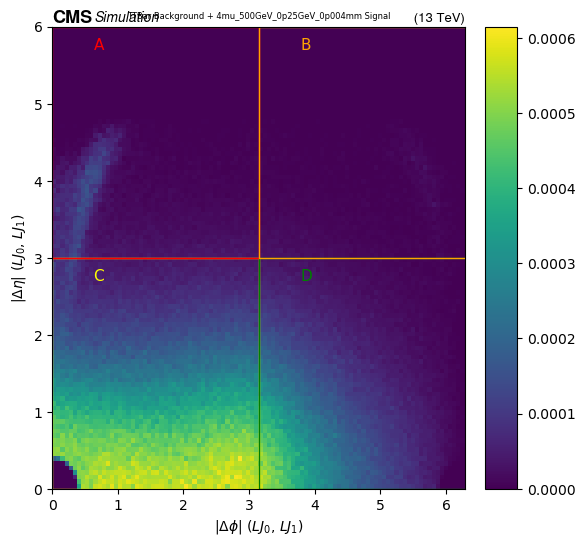

In [16]:
ind = -6
a = out[samples[0]]["hists"]["lj_lj_absdphi_absdeta"]["baseNoLj", :, :]
b = out[samples[ind]]["hists"]["lj_lj_absdphi_absdeta"]["baseNoLj", :, :]
c = addHistDensities(a, b, scalar = 0.03)
#X, Y = numpy.meshgrid(c[1], c[2])
#Z = c[0]
#print(c[0])
#print(c[0])

fig, (ax) = plt.subplots(1,1,figsize=(6,6))

utilities.plot(c, flow=False)

counts = ABCD(c, fig, ax, x0, x1)
ax.set_title(f"TTBar Background + {samples[ind]} Signal")
ax.title.set_size(6)
#fig.colorbar(t, ax=ax)
plt.show()

In [17]:
out[samples[-1]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["base", :, :].plot2d_full()

KeyError: 'abcd_lj_lj_invmass_vs_absdphi'

In [ ]:
utilities.plot(out[samples[-1]]["hists"]["lj_lj_invmass"]["base", :])
plt.title(samples[-1])

In [ ]:
utilities.plot(out[samples[-1]]["hists"]["lj_lj_absdphi"]["baseNoLj", :], flow='none', density=True)

In [ ]:
plt.subplots(1,2,figsize=(14,7))
plt.subplot(1,2,1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["lj_lj_absdphi"]["baseNoLj", :], flow='none', density=False)
plt.legend(samples, loc=2, prop={'size': 6})
plt.subplot(1,2,2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["lj_lj_absdphi"]["4mu", :], flow='none', density=True)
plt.legend(samples, loc=2, prop={'size': 6})

In [ ]:
histlist = ["electron_n", "muon_n"]

for hist in histlist:
    plt.subplots(1, 5, figsize=(30, 8))
    for i in range(5):
        plt.subplot(1,5,i+1)
        utilities.plot(out[samples[i]]["hists"][hist]["matchedLj", :], density=True)
        plt.title(samples[i], size=8)
        plt.legend([samples[i]], prop={"size": 12})

In [ ]:
histlist = ["lj_n", "lj_lj_invmass"]

for hist in histlist:
    plt.subplots(1, 5, figsize=(30, 8))
    for i in range(5):
        plt.subplot(1,5,i+1)
        utilities.plot(out[samples[i]]["hists"][hist]["4mu", :], density=True)
        plt.title(samples[i], size=8)
        plt.legend([samples[i]], prop={"size": 12})

In [ ]:
hist = "lj_lj_invmass_lowRange"

utilities.plot(out[samples[0]]["hists"][hist]["4mu", :], density=True)
plt.title(samples[0], size=8)
plt.legend([samples[0]], prop={"size": 12})

In [ ]:
cutflow.print_multi_table([out[sample]["cutflow"]["4mu_matchedLj"] for sample in samples], [sample for sample in samples], fraction=False)
# the matched As are gen-level particles, so none are present in TTJets

In [ ]:
histlist = ["muon_pt", "muon_lj_dR_lowRange"]

for hist in histlist:
    plt.subplots(1, 5, figsize=(30, 8))
    for i in range(5):
        plt.subplot(1,5,i+1)
        utilities.plot(out[samples[i]]["hists"][hist]["4mu", :], density=True)
        plt.title(samples[i], size=8)
        plt.legend([samples[i]], prop={"size": 12})

In [ ]:
histlist = ["dsaMuon_n", "dsaMuon_pt"]

for hist in histlist:
    plt.subplots(1, 5, figsize=(30, 8))
    for i in range(5):
        plt.subplot(1,5,i+1)
        utilities.plot(out[samples[i]]["hists"][hist]["matchedLj", :], density=True)
        plt.title(samples[i], size=8)
        plt.legend([samples[i]], prop={"size": 12})

In [ ]:
histlist = ["dsaMuon_eta_phi", "muon_eta_phi"]

for hist in histlist:
    plt.subplots(1, 5, figsize=(30, 8))
    for i in range(5):
        plt.subplot(1,5,i+1)
        utilities.plot(out[samples[i]]["hists"][hist]["matchedLj", :, :])
        plt.title(samples[i], size=8)

In [ ]:
histlist = ["photon_n", "muon_absD0_lowRange"]

for hist in histlist:
    plt.subplots(1, 5, figsize=(30, 8))
    for i in range(5):
        plt.subplot(1,5,i+1)
        utilities.plot(out[samples[i]]["hists"][hist]["matchedLj", :], density=True)
        plt.title(samples[i], size=8)
        plt.legend([samples[i]], prop={"size": 12})

In [ ]:
histlist = ["muon_n","dsaMuon_n","totalMuon_n"]
for hist in histlist:
    utilities.plot(out[samples[-1]]["hists"][hist]["4mu_matchedLj", :], density=False)
plt.legend(histlist)